## Crawling Data From The Web
- Our Data from: [https://www.airlinequality.com] 
- SmallDS (~1000) from: [https://www.airlinequality.com/airline-reviews/british-airways] (British Airways Reviews)
- BigDS (~10.000) from: [https://www.airlinequality.com/review-pages/a-z-airline-reviews] (Review airlines that start with the letters A and B)

### Import Library

In [1]:
import requests
import datetime
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

### Function Crawling 

#### SmallDS

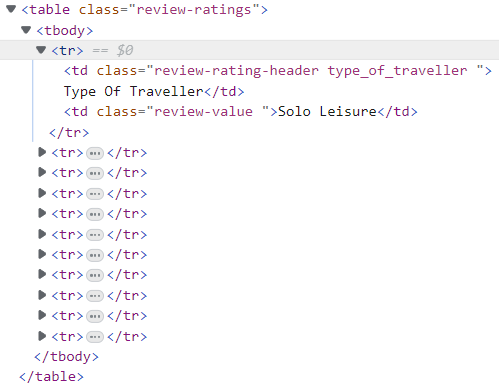

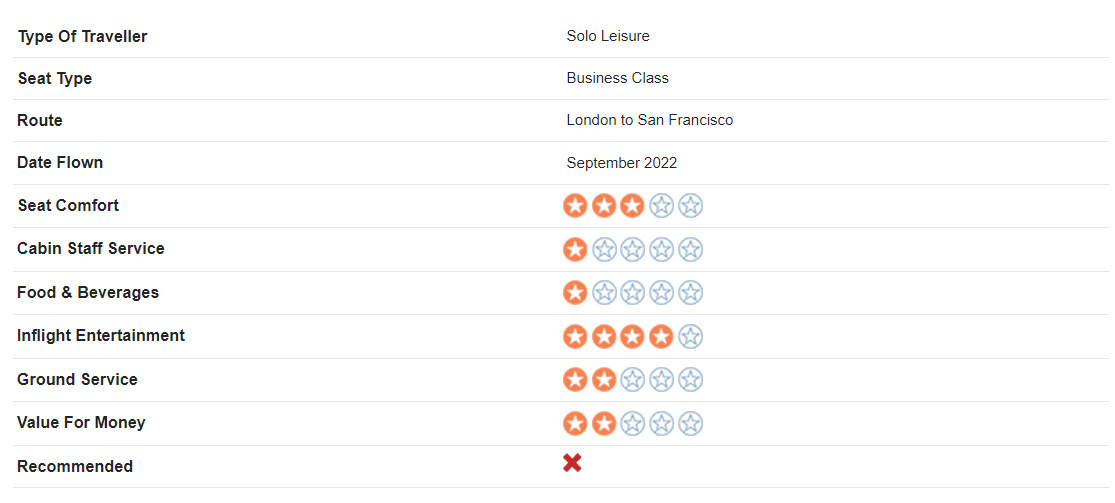

In [6]:
def Crawling_SmallDS():
    # Tính thời gian chạy function
    start_time = time.time()
    
    base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
    pages = 30
    page_size = 100

    reviews = []
    review_detail = []

    for i in range(1, pages + 1):

        print(f"Crawling page {i}")

        # Tạo URL để lấy liên kết tới dữ liệu đã được phân trang
        url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

        # Lấy dữ liệu HTML 
        response = requests.get(url)

        # Parse content
        content = response.content
        parsed_content = BeautifulSoup(content, 'html.parser')

        # Tìm tất cả bảng với class = "review-ratings"
        review_tables = parsed_content.find_all("table", {"class": "review-ratings"})

        # Lập qua từng bảng, phân rã các rating
        for table in review_tables:
            rows = table.find_all("tr")
            # Chỉ thu thập các bảng có trên 12 trường tiêu chí đánh giá
            if len(rows) >= 12:
                for row in rows:
                    columns = row.find_all("td")
                    rating_category = columns[0].text.strip()
                    if "review-value" in columns[1]["class"]:
                        rating_value = columns[1].text.strip()
                    else:
                        rating_value = len(columns[1].find_all("span", {"class": "star fill"}))
                    review_detail.append({rating_category: rating_value})
                reviews.append(review_detail)
                review_detail = []
        print(f"   ---> {len(reviews)} total reviews")
        
    end_time = time.time()
    running_time = end_time - start_time
    print("Running time:", running_time, "seconds")
    return reviews

In [2]:
def Crawling_SmallDS_demo(pages, page_size):
    # Tính thời gian chạy function
    start_time = time.time()
    
    base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

    reviews = []
    review_detail = []

    for i in range(1, pages + 1):

        print(f"Crawling page {i}")

        # Tạo URL để lấy liên kết tới dữ liệu đã được phân trang
        url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

        # Lấy dữ liệu HTML 
        response = requests.get(url)

        # Parse content
        content = response.content
        parsed_content = BeautifulSoup(content, 'html.parser')

        # Tìm tất cả bảng với class = "review-ratings"
        review_tables = parsed_content.find_all("table", {"class": "review-ratings"})

        # Lập qua từng bảng, phân rã các rating
        for table in review_tables:
            rows = table.find_all("tr")
            # Chỉ thu thập các bảng có trên 12 trường tiêu chí đánh giá
            if len(rows) >= 12:
                for row in rows:
                    columns = row.find_all("td")
                    rating_category = columns[0].text.strip()
                    if "review-value" in columns[1]["class"]:
                        rating_value = columns[1].text.strip()
                    else:
                        rating_value = len(columns[1].find_all("span", {"class": "star fill"}))
                    review_detail.append({rating_category: rating_value})
                reviews.append(review_detail)
                review_detail = []
        print(f"   ---> {len(reviews)} total reviews")
        
    end_time = time.time()
    running_time = end_time - start_time
    print("Running time:", running_time, "seconds")
    return reviews

#### BigDS

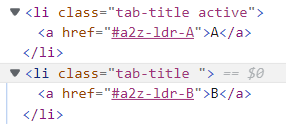

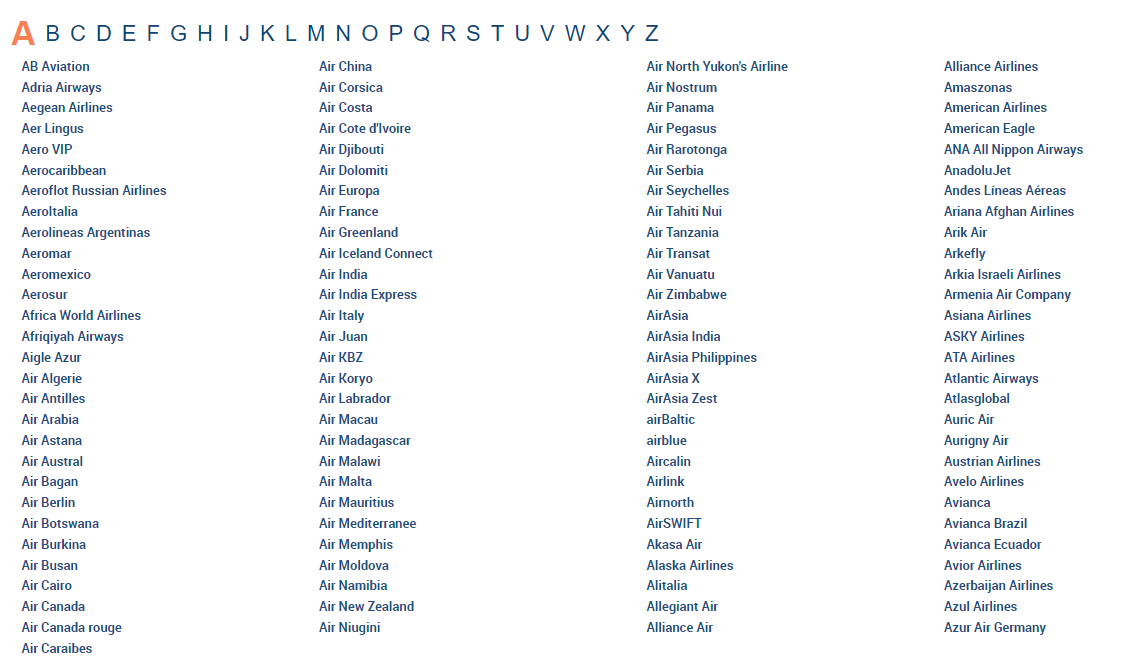

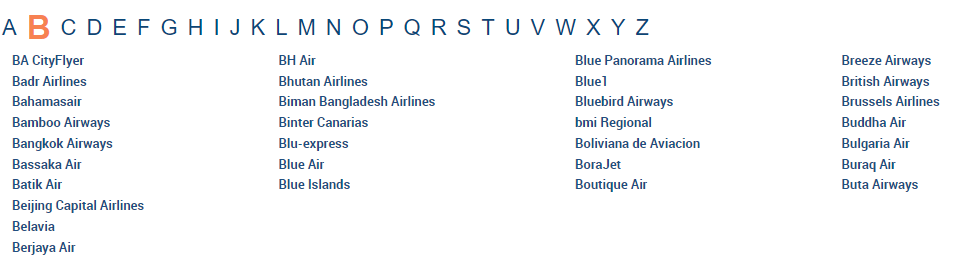

In [8]:
def Crawling_BigDS():
    # Tính thời gian chạy function
    start_time = time.time()
    
    base_url = "https://www.airlinequality.com/review-pages/a-z-airline-reviews"
    letter_begin = ['A', 'B']
    reviews = []
    review_detail = []
    for letter in letter_begin:
        # Tải nội dung trang web
        response = requests.get(base_url)
        html_content = response.content

        # Phân tích cú pháp HTML
        soup = BeautifulSoup(html_content, 'html.parser')

        # Tìm thẻ div với tên a2z-ldr-A
        div_element = soup.find('div', {'id': 'a2z-ldr-'+letter})

        # Tìm tất cả các thẻ li trong div_element
        li_elements = div_element.find_all('li')

        # Lặp qua từng thẻ li và lấy giá trị href
        href_values = []
        for li in li_elements:
            a_element = li.find('a')
            href = a_element['href']
            href_values.append(href)

        # Lấy tên các hãng máy bay từ href
        names = []
        # In kết quả
        for href in href_values:
            # Sử dụng phương thức split() để tách chuỗi theo dấu "/"
            href = href.split("/")

            # Lấy phần tử cuối cùng trong danh sách các phần tử đã tách
            names.append(href[-1]) 

        for name in names:
            print(name)

        # Lay du lieu 
        url = "https://www.airlinequality.com/airline-reviews/"
        pages = 0
        page_size = 100
        for name in names:
            new_url = url + name
            print(f"Scraping url of {name}")
            # Tính số trang từ số review của hãng {name}
            # Collect HTML data from this page
            response = requests.get(new_url + "/page/1")
            # Parse content
            content = response.content
            parsed_content = BeautifulSoup(content, 'html.parser')

            # Tìm thẻ div với tên a2z-ldr-A
            div_element = parsed_content.find('div', {"class": "pagination-total"})
            # Lấy giá trị string trong thẻ div
            if div_element:
                string = div_element.string
                # Tách chuỗi thành các phần tử
                parts = string.split()
                # Lặp qua từng phần tử để tìm giá trị số
                numbers = []
                for part in parts:
                    if part.isdigit():
                        numbers.append(int(part))

                # Lấy giá trị lớn nhất từ danh sách số
                max_number = max(numbers)
                print(f"\t reviews: {max_number}")
                if (max_number<100):
                    pages = 1
                else: 
                    pages = math.ceil(max_number/100)
            else:
                pages = 1
            print(f"\t page: {pages}")

            for i in range(1, pages + 1):
                scrap_url = f"{new_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
                # Collect HTML data from this page
                response = requests.get(scrap_url)

                # Parse content
                content = response.content
                parsed_content = BeautifulSoup(content, 'html.parser')

                # Find all tables with class "review-ratings"
                review_tables = parsed_content.find_all("table", {"class": "review-ratings"})

                # Loop through each table and extract the ratings
                for table in review_tables:
                    rows = table.find_all("tr")
                    if len(rows) >= 12:
                        for row in rows:
                            columns = row.find_all("td")
                            rating_category = columns[0].text.strip()
                            if "review-value" in columns[1]["class"]:
                                rating_value = columns[1].text.strip()
                            else:
                                rating_value = len(columns[1].find_all("span", {"class": "star fill"}))
                            #print(f"{rating_category}: {rating_value}")
                            review_detail.append({rating_category: rating_value})
                        review_detail.append({"Airline Name": name})
                        reviews.append(review_detail)
                        review_detail = []
                print(f"\t---> {len(reviews)} total reviews")
                
    end_time = time.time()
    running_time = end_time - start_time
    print("Running time:", running_time, "seconds")
    return reviews

### Function Format Crawling Data

In [4]:
def ReviewToDict(review):
    # Change type of review: list to dict
    dict_result = {}
    for d in review:
        dict_result.update(d)
    return dict_result


def FormatDatasetReviews(reviews):
    columns = []
    result = []
    
    # Setting 14 categories in a review
    categories = set()
    for review in reviews:
        for rating in review:
            categories.add(list(rating.keys())[0])
    for category in sorted(categories):
        columns.append(category)
    
    
    # Sorting category values in reviews
    for review in reviews:
        output = []
        dict_review = ReviewToDict(review)
        for category in columns:
            output.append(dict_review.get(category,"NaN"))
        result.append(output)
    return result, columns

### Crawling SmallDS

In [14]:
reviews = Crawling_SmallDS()
data_reviews, categories = FormatDatasetReviews(reviews)

# Create DataFrame from data_reviews and categories
df = pd.DataFrame(data_reviews, columns=categories)

# replace String 'NaN' by null value in pandas
df.replace('NaN', np.nan, inplace=True)

# Save to csv file
df.to_csv("SmallDS.csv")

Crawling page 1
   ---> 52 total reviews
Crawling page 2
   ---> 102 total reviews
Crawling page 3
   ---> 151 total reviews
Crawling page 4
   ---> 184 total reviews
Crawling page 5
   ---> 225 total reviews
Crawling page 6
   ---> 277 total reviews
Crawling page 7
   ---> 320 total reviews
Crawling page 8
   ---> 361 total reviews
Crawling page 9
   ---> 423 total reviews
Crawling page 10
   ---> 472 total reviews
Crawling page 11
   ---> 525 total reviews
Crawling page 12
   ---> 572 total reviews
Crawling page 13
   ---> 622 total reviews
Crawling page 14
   ---> 671 total reviews
Crawling page 15
   ---> 716 total reviews
Crawling page 16
   ---> 767 total reviews
Crawling page 17
   ---> 830 total reviews
Crawling page 18
   ---> 889 total reviews
Crawling page 19
   ---> 948 total reviews
Crawling page 20
   ---> 1006 total reviews
Crawling page 21
   ---> 1065 total reviews
Crawling page 22
   ---> 1121 total reviews
Crawling page 23
   ---> 1179 total reviews
Crawling page 24


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                1253 non-null   object 
 1   Cabin Staff Service     1444 non-null   int64  
 2   Date Flown              1444 non-null   object 
 3   Food & Beverages        1441 non-null   float64
 4   Ground Service          1444 non-null   int64  
 5   Inflight Entertainment  1415 non-null   float64
 6   Recommended             1444 non-null   object 
 7   Route                   1444 non-null   object 
 8   Seat Comfort            1444 non-null   int64  
 9   Seat Type               1444 non-null   object 
 10  Type Of Traveller       1444 non-null   object 
 11  Value For Money         1444 non-null   int64  
 12  Wifi & Connectivity     533 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 146.8+ KB


In [12]:
df.head()

,Aircraft,Airline Name,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,NaN,adria-airways,1,September 2019,1.0,1,1.0,no,Sofia to Amsterdam via Ljubljana,1,Economy Class,Couple Leisure,1,1.0
1,CR 900,adria-airways,1,September 2019,1.0,1,1.0,no,Sarajevo to Ljubljana,1,Economy Class,Couple Leisure,1,1.0
2,Bombardier CRJ,adria-airways,1,August 2019,1.0,1,1.0,no,Timisoara to Munich,1,Economy Class,Solo Leisure,1,1.0
3,NaN,adria-airways,2,August 2019,1.0,1,1.0,no,Pristina to Zürich via Ljubliana,1,Economy Class,Solo Leisure,1,1.0
4,NaN,adria-airways,1,March 2018,1.0,1,1.0,no,Ljubljana to Frankfurt,2,Economy Class,Solo Leisure,1,1.0


### Crawling BigDS

In [10]:
reviews = Crawling_BigDS()
data_reviews, categories = FormatDatasetReviews(reviews)

# Create DataFrame from data_reviews and categories
df = pd.DataFrame(data_reviews, columns=categories)

# replace String 'NaN' by null value in pandas
df.replace('NaN', np.nan, inplace=True)

# Save to csv file
df.to_csv("BigDS.csv")

ab-aviation
adria-airways
aegean-airlines
aer-lingus
aero-vip
aerocaribbean
aeroflot-russian-airlines
aeroitalia
aerolineas-argentinas
aeromar
aeromexico
aerosur
africa-world-airlines
afriqiyah-airways
aigle-azur
air-algerie
air-antilles
air-arabia
air-astana
air-austral
air-bagan
air-berlin
air-botswana
air-burkina
air-busan
air-cairo
air-canada
air-canada-rouge
air-caraibes
air-china
air-corsica
air-costa
air-cote-divoire
air-djibouti
air-dolomiti
air-europa
air-france
air-greenland
air-iceland-connect
air-india
air-india-express
air-italy
air-juan
air-kbz
air-koryo
air-labrador
air-macau
air-madagascar
air-malawi
air-malta
air-mauritius
air-mediterranee
air-memphis
air-moldova
air-namibia
air-new-zealand
air-niugini
air-north-yukons-airline
air-nostrum
air-panama
air-pegasus
air-rarotonga
air-serbia
air-seychelles
air-tahiti-nui
air-tanzania
air-transat
air-vanuata
air-zimbabwe
airasia
airasia-india
airasia-philippines
airasia-x
airasia-zest
airbaltic
air-blue
aircalin
airlink
airno

	 reviews: 809
	 page: 9
	---> 3854 total reviews
	---> 3895 total reviews
	---> 3950 total reviews
	---> 4014 total reviews
	---> 4089 total reviews
	---> 4096 total reviews
	---> 4096 total reviews
	---> 4096 total reviews
	---> 4096 total reviews
Scraping url of air-niugini
	 reviews: 51
	 page: 1
	---> 4115 total reviews
Scraping url of air-north-yukons-airline
	 page: 1
	---> 4115 total reviews
Scraping url of air-nostrum
	 reviews: 44
	 page: 1
	---> 4118 total reviews
Scraping url of air-panama
	 reviews: 14
	 page: 1
	---> 4118 total reviews
Scraping url of air-pegasus
	 page: 1
	---> 4118 total reviews
Scraping url of air-rarotonga
	 page: 1
	---> 4118 total reviews
Scraping url of air-serbia
	 reviews: 244
	 page: 3
	---> 4163 total reviews
	---> 4199 total reviews
	---> 4199 total reviews
Scraping url of air-seychelles
	 reviews: 74
	 page: 1
	---> 4220 total reviews
Scraping url of air-tahiti-nui
	 reviews: 109
	 page: 2
	---> 4248 total reviews
	---> 4248 total reviews
Scr

	 reviews: 72
	 page: 1
	---> 9000 total reviews
Scraping url of badr-airlines
	 page: 1
	---> 9000 total reviews
Scraping url of bahamasair
	 reviews: 56
	 page: 1
	---> 9010 total reviews
Scraping url of bamboo-airways
	 reviews: 34
	 page: 1
	---> 9020 total reviews
Scraping url of bangkok-airways
	 reviews: 404
	 page: 5
	---> 9037 total reviews
	---> 9055 total reviews
	---> 9055 total reviews
	---> 9055 total reviews
	---> 9055 total reviews
Scraping url of bassaka-air
	 page: 1
	---> 9055 total reviews
Scraping url of batik-air
	 reviews: 110
	 page: 2
	---> 9110 total reviews
	---> 9118 total reviews
Scraping url of beijing-capital-airlines
	 page: 1
	---> 9120 total reviews
Scraping url of belavia
	 reviews: 45
	 page: 1
	---> 9126 total reviews
Scraping url of berjaya-air
	 reviews: 12
	 page: 1
	---> 9126 total reviews
Scraping url of bh-airlines
	 page: 1
	---> 9127 total reviews
Scraping url of bhutan-airlines
	 page: 1
	---> 9128 total reviews
Scraping url of biman-bangla

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10790 entries, 0 to 10789
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                6181 non-null   object 
 1   Airline Name            10790 non-null  object 
 2   Cabin Staff Service     10790 non-null  int64  
 3   Date Flown              10790 non-null  object 
 4   Food & Beverages        10740 non-null  float64
 5   Ground Service          10790 non-null  int64  
 6   Inflight Entertainment  10635 non-null  float64
 7   Recommended             10790 non-null  object 
 8   Route                   10788 non-null  object 
 9   Seat Comfort            10790 non-null  int64  
 10  Seat Type               10790 non-null  object 
 11  Type Of Traveller       10790 non-null  object 
 12  Value For Money         10790 non-null  int64  
 13  Wifi & Connectivity     7041 non-null   float64
dtypes: float64(3), int64(4), object(7)
mem

In [14]:
df.head()

,Aircraft,Airline Name,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,NaN,adria-airways,1,September 2019,1.0,1,1.0,no,Sofia to Amsterdam via Ljubljana,1,Economy Class,Couple Leisure,1,1.0
1,CR 900,adria-airways,1,September 2019,1.0,1,1.0,no,Sarajevo to Ljubljana,1,Economy Class,Couple Leisure,1,1.0
2,Bombardier CRJ,adria-airways,1,August 2019,1.0,1,1.0,no,Timisoara to Munich,1,Economy Class,Solo Leisure,1,1.0
3,NaN,adria-airways,2,August 2019,1.0,1,1.0,no,Pristina to Zürich via Ljubliana,1,Economy Class,Solo Leisure,1,1.0
4,NaN,adria-airways,1,March 2018,1.0,1,1.0,no,Ljubljana to Frankfurt,2,Economy Class,Solo Leisure,1,1.0


### Crawling demo (Crawling SmallDS)

In [5]:
reviews = Crawling_SmallDS_demo(1,15)
data_reviews, categories = FormatDatasetReviews(reviews)

# Create DataFrame from data_reviews and categories
df = pd.DataFrame(data_reviews, columns=categories)

# replace String 'NaN' by null value in pandas
df.replace('NaN', np.nan, inplace=True)

# Save to csv file
df.to_csv("Demo_Crawling_Data.csv")

Crawling page 1
   ---> 10 total reviews
Running time: 2.2786667346954346 seconds


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                4 non-null      object 
 1   Cabin Staff Service     10 non-null     int64  
 2   Date Flown              10 non-null     object 
 3   Food & Beverages        10 non-null     int64  
 4   Ground Service          10 non-null     int64  
 5   Inflight Entertainment  9 non-null      float64
 6   Recommended             10 non-null     object 
 7   Route                   10 non-null     object 
 8   Seat Comfort            10 non-null     int64  
 9   Seat Type               10 non-null     object 
 10  Type Of Traveller       10 non-null     object 
 11  Value For Money         10 non-null     int64  
 12  Wifi & Connectivity     10 non-null     int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.1+ KB


In [7]:
df.head(10)

,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,A320 Finnair,2,May 2023,3,1,1.0,no,London Heathrow to Malaga,2,Business Class,Business,1,1
1,A319,3,May 2023,3,4,NaN,no,London to Nice,2,Business Class,Couple Leisure,1,1
2,NaN,1,April 2023,3,1,3.0,no,London to Dallas,1,Economy Class,Solo Leisure,1,1
3,NaN,3,May 2023,3,1,1.0,no,London to Belfast,1,Economy Class,Solo Leisure,1,1
4,NaN,5,May 2023,4,1,5.0,no,Los Angeles to London,5,Business Class,Couple Leisure,1,2
5,NaN,3,April 2023,1,1,2.0,no,Atlanta to London,4,Business Class,Couple Leisure,1,1
6,Boeing 787-9,1,May 2023,1,1,1.0,no,Sydney to London via Singapore,1,Business Class,Solo Leisure,1,1
7,NaN,1,May 2023,1,1,1.0,no,Heathrow to Faro,1,Business Class,Solo Leisure,1,1
8,NaN,3,April 2023,3,1,3.0,no,New York to London,4,Economy Class,Business,1,4
9,Boeing 787,2,April 2023,1,3,5.0,no,Singapore to London,4,Business Class,Couple Leisure,1,1


In [10]:
reviews = Crawling_SmallDS_demo(1,15)


Crawling page 1
   ---> 10 total reviews
Running time: 2.1884448528289795 seconds


In [11]:
reviews[0]

[{'Aircraft': 'A319'},
 {'Type Of Traveller': 'Couple Leisure'},
 {'Seat Type': 'Business Class'},
 {'Route': 'London to Nice'},
 {'Date Flown': 'May 2023'},
 {'Seat Comfort': 2},
 {'Cabin Staff Service': 3},
 {'Food & Beverages': 3},
 {'Ground Service': 4},
 {'Wifi & Connectivity': 1},
 {'Value For Money': 1},
 {'Recommended': 'no'}]

In [13]:
data_reviews, categories = FormatDatasetReviews(reviews)
data_reviews[0]

['A319',
 3,
 'May 2023',
 3,
 4,
 'NaN',
 'no',
 'London to Nice',
 2,
 'Business Class',
 'Couple Leisure',
 1,
 1]